In [55]:
import pandas as pd 
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials 
from collections import Counter

In [56]:
sp = spotipy.Spotify() 

cid ="d062190fd93b4e4488e75ae2d9256814" 

secret = "5afbd4a19ee54607be0db6036fb417c2"

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 

sp.trace=False 

In [57]:
playlist_l = sp.user_playlist("Liked", "3cYqEaPBFyxqlXbViPtzDv?si=3553c6c98f714847") 
playlist_d = sp.user_playlist("Disliked", "4HC1kIY2bof1CHfZqmo8u1?si=080494e8e1bf4f75") 

In [58]:
liked_songs = playlist_l["tracks"]["items"] 

In [59]:
liked_ids = [] 
for i in range(len(liked_songs)): 
    liked_ids.append(liked_songs[i]["track"]["id"])

In [60]:
liked_features = sp.audio_features(liked_ids) 

In [61]:
liked_df = pd.DataFrame(liked_features)
liked_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.271,0.165,5,-20.652,1,0.0351,0.7290,0.000002,0.1180,0.2030,77.082,audio_features,29U7stRjqHU6rMiS8BfaI9,spotify:track:29U7stRjqHU6rMiS8BfaI9,https://api.spotify.com/v1/tracks/29U7stRjqHU6...,https://api.spotify.com/v1/audio-analysis/29U7...,139227,4
1,0.177,0.215,3,-9.886,1,0.0335,0.8070,0.000125,0.0921,0.0415,75.862,audio_features,2MfwT3SKUyF0na2LCa2fCp,spotify:track:2MfwT3SKUyF0na2LCa2fCp,https://api.spotify.com/v1/tracks/2MfwT3SKUyF0...,https://api.spotify.com/v1/audio-analysis/2Mfw...,188864,3
2,0.530,0.497,0,-11.348,1,0.0322,0.4980,0.000384,0.0665,0.1000,141.977,audio_features,5b7wNSn8yuj5ZZ3JAlzoBt,spotify:track:5b7wNSn8yuj5ZZ3JAlzoBt,https://api.spotify.com/v1/tracks/5b7wNSn8yuj5...,https://api.spotify.com/v1/audio-analysis/5b7w...,345933,4
3,0.617,0.567,0,-4.188,1,0.0828,0.0584,0.000000,0.0933,0.5050,90.246,audio_features,1CnPYaKxTVb4LWOtiGOm0m,spotify:track:1CnPYaKxTVb4LWOtiGOm0m,https://api.spotify.com/v1/tracks/1CnPYaKxTVb4...,https://api.spotify.com/v1/audio-analysis/1CnP...,217603,4
4,0.214,0.367,6,-10.858,0,0.0321,0.8440,0.018100,0.1880,0.1750,79.854,audio_features,1M8OAc4NnD5GFMUiqjebaS,spotify:track:1M8OAc4NnD5GFMUiqjebaS,https://api.spotify.com/v1/tracks/1M8OAc4NnD5G...,https://api.spotify.com/v1/audio-analysis/1M8O...,281844,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.374,0.249,1,-10.985,1,0.0395,0.9360,0.008760,0.1140,0.0633,128.018,audio_features,4eCXQY1vh9XMW66LmS5alP,spotify:track:4eCXQY1vh9XMW66LmS5alP,https://api.spotify.com/v1/tracks/4eCXQY1vh9XM...,https://api.spotify.com/v1/audio-analysis/4eCX...,200093,4
96,0.588,0.362,8,-13.062,1,0.0295,0.4330,0.004680,0.0904,0.0995,132.472,audio_features,6UzdCUyZa27ez12pK56uSo,spotify:track:6UzdCUyZa27ez12pK56uSo,https://api.spotify.com/v1/tracks/6UzdCUyZa27e...,https://api.spotify.com/v1/audio-analysis/6Uzd...,379653,4
97,0.401,0.567,10,-9.131,1,0.0355,0.1710,0.008590,0.1030,0.3620,171.059,audio_features,6FQcdl2PzmsoXRF3F1flZ5,spotify:track:6FQcdl2PzmsoXRF3F1flZ5,https://api.spotify.com/v1/tracks/6FQcdl2Pzmso...,https://api.spotify.com/v1/audio-analysis/6FQc...,217973,3
98,0.626,0.308,6,-17.163,0,0.0294,0.8300,0.057800,0.1080,0.3230,129.928,audio_features,5kkqN6Lx3ZioloqqxC7Kyj,spotify:track:5kkqN6Lx3ZioloqqxC7Kyj,https://api.spotify.com/v1/tracks/5kkqN6Lx3Zio...,https://api.spotify.com/v1/audio-analysis/5kkq...,226890,4


In [62]:
target = []

for i in range(liked_df.shape[0]):
    target.append(1)

In [63]:
liked_df['target'] = target
liked_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,target
0,0.271,0.165,5,-20.652,1,0.0351,0.7290,0.000002,0.1180,0.2030,77.082,audio_features,29U7stRjqHU6rMiS8BfaI9,spotify:track:29U7stRjqHU6rMiS8BfaI9,https://api.spotify.com/v1/tracks/29U7stRjqHU6...,https://api.spotify.com/v1/audio-analysis/29U7...,139227,4,1
1,0.177,0.215,3,-9.886,1,0.0335,0.8070,0.000125,0.0921,0.0415,75.862,audio_features,2MfwT3SKUyF0na2LCa2fCp,spotify:track:2MfwT3SKUyF0na2LCa2fCp,https://api.spotify.com/v1/tracks/2MfwT3SKUyF0...,https://api.spotify.com/v1/audio-analysis/2Mfw...,188864,3,1
2,0.530,0.497,0,-11.348,1,0.0322,0.4980,0.000384,0.0665,0.1000,141.977,audio_features,5b7wNSn8yuj5ZZ3JAlzoBt,spotify:track:5b7wNSn8yuj5ZZ3JAlzoBt,https://api.spotify.com/v1/tracks/5b7wNSn8yuj5...,https://api.spotify.com/v1/audio-analysis/5b7w...,345933,4,1
3,0.617,0.567,0,-4.188,1,0.0828,0.0584,0.000000,0.0933,0.5050,90.246,audio_features,1CnPYaKxTVb4LWOtiGOm0m,spotify:track:1CnPYaKxTVb4LWOtiGOm0m,https://api.spotify.com/v1/tracks/1CnPYaKxTVb4...,https://api.spotify.com/v1/audio-analysis/1CnP...,217603,4,1
4,0.214,0.367,6,-10.858,0,0.0321,0.8440,0.018100,0.1880,0.1750,79.854,audio_features,1M8OAc4NnD5GFMUiqjebaS,spotify:track:1M8OAc4NnD5GFMUiqjebaS,https://api.spotify.com/v1/tracks/1M8OAc4NnD5G...,https://api.spotify.com/v1/audio-analysis/1M8O...,281844,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.374,0.249,1,-10.985,1,0.0395,0.9360,0.008760,0.1140,0.0633,128.018,audio_features,4eCXQY1vh9XMW66LmS5alP,spotify:track:4eCXQY1vh9XMW66LmS5alP,https://api.spotify.com/v1/tracks/4eCXQY1vh9XM...,https://api.spotify.com/v1/audio-analysis/4eCX...,200093,4,1
96,0.588,0.362,8,-13.062,1,0.0295,0.4330,0.004680,0.0904,0.0995,132.472,audio_features,6UzdCUyZa27ez12pK56uSo,spotify:track:6UzdCUyZa27ez12pK56uSo,https://api.spotify.com/v1/tracks/6UzdCUyZa27e...,https://api.spotify.com/v1/audio-analysis/6Uzd...,379653,4,1
97,0.401,0.567,10,-9.131,1,0.0355,0.1710,0.008590,0.1030,0.3620,171.059,audio_features,6FQcdl2PzmsoXRF3F1flZ5,spotify:track:6FQcdl2PzmsoXRF3F1flZ5,https://api.spotify.com/v1/tracks/6FQcdl2Pzmso...,https://api.spotify.com/v1/audio-analysis/6FQc...,217973,3,1
98,0.626,0.308,6,-17.163,0,0.0294,0.8300,0.057800,0.1080,0.3230,129.928,audio_features,5kkqN6Lx3ZioloqqxC7Kyj,spotify:track:5kkqN6Lx3ZioloqqxC7Kyj,https://api.spotify.com/v1/tracks/5kkqN6Lx3Zio...,https://api.spotify.com/v1/audio-analysis/5kkq...,226890,4,1


In [64]:
disliked_songs = playlist_d["tracks"]["items"] 

In [65]:
disliked_ids = []
for i in range(len(disliked_songs)): 
    disliked_ids.append(disliked_songs[i]["track"]["id"])

In [66]:
disliked_features = sp.audio_features(disliked_ids) 

In [67]:
disliked_df = pd.DataFrame(disliked_features)
disliked_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.742,0.4970,0,-9.381,0,0.0746,0.24900,0.003350,0.0993,0.5580,156.013,audio_features,3dEtfTtCXWW7N8WQ9FD29z,spotify:track:3dEtfTtCXWW7N8WQ9FD29z,https://api.spotify.com/v1/tracks/3dEtfTtCXWW7...,https://api.spotify.com/v1/audio-analysis/3dEt...,310860,4
1,0.699,0.5880,9,-6.533,0,0.0402,0.00807,0.000131,0.1070,0.3500,151.971,audio_features,2TaWcNAkUM6buVOkL0CNh9,spotify:track:2TaWcNAkUM6buVOkL0CNh9,https://api.spotify.com/v1/tracks/2TaWcNAkUM6b...,https://api.spotify.com/v1/audio-analysis/2TaW...,199122,4
2,0.642,0.7230,1,-6.149,1,0.2430,0.58000,0.000942,0.1120,0.4870,186.043,audio_features,1EYeZGTMCjV7uVey5fNWXM,spotify:track:1EYeZGTMCjV7uVey5fNWXM,https://api.spotify.com/v1/tracks/1EYeZGTMCjV7...,https://api.spotify.com/v1/audio-analysis/1EYe...,135480,4
3,0.862,0.5060,10,-8.651,0,0.2670,0.05420,0.000030,0.1170,0.5120,136.052,audio_features,5h1Zdr8ghV5RaWjtdfVo8w,spotify:track:5h1Zdr8ghV5RaWjtdfVo8w,https://api.spotify.com/v1/tracks/5h1Zdr8ghV5R...,https://api.spotify.com/v1/audio-analysis/5h1Z...,198582,4
4,0.921,0.4320,0,-11.109,1,0.0502,0.50600,0.002230,0.0617,0.6930,112.117,audio_features,4Pv7OY4tfCA8KIdtlkANOS,spotify:track:4Pv7OY4tfCA8KIdtlkANOS,https://api.spotify.com/v1/tracks/4Pv7OY4tfCA8...,https://api.spotify.com/v1/audio-analysis/4Pv7...,178320,4
5,0.619,0.6720,0,-5.770,0,0.0468,0.23700,0.001490,0.1170,0.3360,163.942,audio_features,1iEMuRRbD04w92WzHYkJrF,spotify:track:1iEMuRRbD04w92WzHYkJrF,https://api.spotify.com/v1/tracks/1iEMuRRbD04w...,https://api.spotify.com/v1/audio-analysis/1iEM...,180227,4
6,0.697,0.7190,7,-6.314,0,0.0571,0.50300,0.000000,0.1280,0.7510,86.000,audio_features,2ssVmL3NSOKPW46GWgXyu4,spotify:track:2ssVmL3NSOKPW46GWgXyu4,https://api.spotify.com/v1/tracks/2ssVmL3NSOKP...,https://api.spotify.com/v1/audio-analysis/2ssV...,193083,4
7,0.590,0.8650,7,-4.616,0,0.0516,0.25300,0.000004,0.1720,0.4180,150.068,audio_features,3Vlfg0IreM7wVuZA0zoGDd,spotify:track:3Vlfg0IreM7wVuZA0zoGDd,https://api.spotify.com/v1/tracks/3Vlfg0IreM7w...,https://api.spotify.com/v1/audio-analysis/3Vlf...,239630,4
8,0.757,0.6960,11,-9.406,0,0.1610,0.09250,0.005510,0.1290,0.5260,93.003,audio_features,0O2zRCntGYssJk4bGn6dXk,spotify:track:0O2zRCntGYssJk4bGn6dXk,https://api.spotify.com/v1/tracks/0O2zRCntGYss...,https://api.spotify.com/v1/audio-analysis/0O2z...,210640,4
9,0.957,0.7170,8,-7.801,1,0.1730,0.12800,0.000000,0.0896,0.8550,116.020,audio_features,5JXUr2W37Xcg2KWBDTUKko,spotify:track:5JXUr2W37Xcg2KWBDTUKko,https://api.spotify.com/v1/tracks/5JXUr2W37Xcg...,https://api.spotify.com/v1/audio-analysis/5JXU...,87007,4


In [68]:
liked_target = []

for i in range(disliked_df.shape[0]):
    liked_target.append(0)

In [69]:
disliked_df['target'] = liked_target
disliked_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,target
0,0.742,0.4970,0,-9.381,0,0.0746,0.24900,0.003350,0.0993,0.5580,156.013,audio_features,3dEtfTtCXWW7N8WQ9FD29z,spotify:track:3dEtfTtCXWW7N8WQ9FD29z,https://api.spotify.com/v1/tracks/3dEtfTtCXWW7...,https://api.spotify.com/v1/audio-analysis/3dEt...,310860,4,0
1,0.699,0.5880,9,-6.533,0,0.0402,0.00807,0.000131,0.1070,0.3500,151.971,audio_features,2TaWcNAkUM6buVOkL0CNh9,spotify:track:2TaWcNAkUM6buVOkL0CNh9,https://api.spotify.com/v1/tracks/2TaWcNAkUM6b...,https://api.spotify.com/v1/audio-analysis/2TaW...,199122,4,0
2,0.642,0.7230,1,-6.149,1,0.2430,0.58000,0.000942,0.1120,0.4870,186.043,audio_features,1EYeZGTMCjV7uVey5fNWXM,spotify:track:1EYeZGTMCjV7uVey5fNWXM,https://api.spotify.com/v1/tracks/1EYeZGTMCjV7...,https://api.spotify.com/v1/audio-analysis/1EYe...,135480,4,0
3,0.862,0.5060,10,-8.651,0,0.2670,0.05420,0.000030,0.1170,0.5120,136.052,audio_features,5h1Zdr8ghV5RaWjtdfVo8w,spotify:track:5h1Zdr8ghV5RaWjtdfVo8w,https://api.spotify.com/v1/tracks/5h1Zdr8ghV5R...,https://api.spotify.com/v1/audio-analysis/5h1Z...,198582,4,0
4,0.921,0.4320,0,-11.109,1,0.0502,0.50600,0.002230,0.0617,0.6930,112.117,audio_features,4Pv7OY4tfCA8KIdtlkANOS,spotify:track:4Pv7OY4tfCA8KIdtlkANOS,https://api.spotify.com/v1/tracks/4Pv7OY4tfCA8...,https://api.spotify.com/v1/audio-analysis/4Pv7...,178320,4,0
5,0.619,0.6720,0,-5.770,0,0.0468,0.23700,0.001490,0.1170,0.3360,163.942,audio_features,1iEMuRRbD04w92WzHYkJrF,spotify:track:1iEMuRRbD04w92WzHYkJrF,https://api.spotify.com/v1/tracks/1iEMuRRbD04w...,https://api.spotify.com/v1/audio-analysis/1iEM...,180227,4,0
6,0.697,0.7190,7,-6.314,0,0.0571,0.50300,0.000000,0.1280,0.7510,86.000,audio_features,2ssVmL3NSOKPW46GWgXyu4,spotify:track:2ssVmL3NSOKPW46GWgXyu4,https://api.spotify.com/v1/tracks/2ssVmL3NSOKP...,https://api.spotify.com/v1/audio-analysis/2ssV...,193083,4,0
7,0.590,0.8650,7,-4.616,0,0.0516,0.25300,0.000004,0.1720,0.4180,150.068,audio_features,3Vlfg0IreM7wVuZA0zoGDd,spotify:track:3Vlfg0IreM7wVuZA0zoGDd,https://api.spotify.com/v1/tracks/3Vlfg0IreM7w...,https://api.spotify.com/v1/audio-analysis/3Vlf...,239630,4,0
8,0.757,0.6960,11,-9.406,0,0.1610,0.09250,0.005510,0.1290,0.5260,93.003,audio_features,0O2zRCntGYssJk4bGn6dXk,spotify:track:0O2zRCntGYssJk4bGn6dXk,https://api.spotify.com/v1/tracks/0O2zRCntGYss...,https://api.spotify.com/v1/audio-analysis/0O2z...,210640,4,0
9,0.957,0.7170,8,-7.801,1,0.1730,0.12800,0.000000,0.0896,0.8550,116.020,audio_features,5JXUr2W37Xcg2KWBDTUKko,spotify:track:5JXUr2W37Xcg2KWBDTUKko,https://api.spotify.com/v1/tracks/5JXUr2W37Xcg...,https://api.spotify.com/v1/audio-analysis/5JXU...,87007,4,0


In [70]:
#combining

frames = [liked_df, disliked_df]
  
result = pd.concat(frames).reset_index()
result

,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,target
0,0,0.271,0.165,5,-20.652,1,0.0351,0.7290,0.000002,0.1180,0.2030,77.082,audio_features,29U7stRjqHU6rMiS8BfaI9,spotify:track:29U7stRjqHU6rMiS8BfaI9,https://api.spotify.com/v1/tracks/29U7stRjqHU6...,https://api.spotify.com/v1/audio-analysis/29U7...,139227,4,1
1,1,0.177,0.215,3,-9.886,1,0.0335,0.8070,0.000125,0.0921,0.0415,75.862,audio_features,2MfwT3SKUyF0na2LCa2fCp,spotify:track:2MfwT3SKUyF0na2LCa2fCp,https://api.spotify.com/v1/tracks/2MfwT3SKUyF0...,https://api.spotify.com/v1/audio-analysis/2Mfw...,188864,3,1
2,2,0.530,0.497,0,-11.348,1,0.0322,0.4980,0.000384,0.0665,0.1000,141.977,audio_features,5b7wNSn8yuj5ZZ3JAlzoBt,spotify:track:5b7wNSn8yuj5ZZ3JAlzoBt,https://api.spotify.com/v1/tracks/5b7wNSn8yuj5...,https://api.spotify.com/v1/audio-analysis/5b7w...,345933,4,1
3,3,0.617,0.567,0,-4.188,1,0.0828,0.0584,0.000000,0.0933,0.5050,90.246,audio_features,1CnPYaKxTVb4LWOtiGOm0m,spotify:track:1CnPYaKxTVb4LWOtiGOm0m,https://api.spotify.com/v1/tracks/1CnPYaKxTVb4...,https://api.spotify.com/v1/audio-analysis/1CnP...,217603,4,1
4,4,0.214,0.367,6,-10.858,0,0.0321,0.8440,0.018100,0.1880,0.1750,79.854,audio_features,1M8OAc4NnD5GFMUiqjebaS,spotify:track:1M8OAc4NnD5GFMUiqjebaS,https://api.spotify.com/v1/tracks/1M8OAc4NnD5G...,https://api.spotify.com/v1/audio-analysis/1M8O...,281844,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,43,0.907,0.611,10,-4.588,0,0.0923,0.0211,0.000032,0.0317,0.9260,125.982,audio_features,3HUDCgZgaY3ZVWohToy4LJ,spotify:track:3HUDCgZgaY3ZVWohToy4LJ,https://api.spotify.com/v1/tracks/3HUDCgZgaY3Z...,https://api.spotify.com/v1/audio-analysis/3HUD...,165606,4,0
144,44,0.816,0.629,2,-5.568,1,0.2260,0.1330,0.000000,0.0692,0.7140,96.493,audio_features,6LcauUZjF1eXQrgqMUecHX,spotify:track:6LcauUZjF1eXQrgqMUecHX,https://api.spotify.com/v1/tracks/6LcauUZjF1eX...,https://api.spotify.com/v1/audio-analysis/6Lca...,131607,4,0
145,45,0.781,0.944,9,-2.640,0,0.0615,0.0873,0.079500,0.1170,0.9650,103.003,audio_features,1vELwZM3uBYWd8HrtddD4l,spotify:track:1vELwZM3uBYWd8HrtddD4l,https://api.spotify.com/v1/tracks/1vELwZM3uBYW...,https://api.spotify.com/v1/audio-analysis/1vEL...,226480,4,0
146,46,0.672,0.520,8,-7.747,1,0.0353,0.8590,0.000000,0.1150,0.3700,120.001,audio_features,5O2P9iiztwhomNh8xkR9lJ,spotify:track:5O2P9iiztwhomNh8xkR9lJ,https://api.spotify.com/v1/tracks/5O2P9iiztwho...,https://api.spotify.com/v1/audio-analysis/5O2P...,226600,4,0


In [71]:
#shuffle
result = result.sample(frac = 1).reset_index()
result

,level_0,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,target
0,77,77,0.628,0.500,6,-9.660,0,0.0268,0.44000,0.000000,...,0.6800,124.932,audio_features,0GegHVxeozw3rdjte45Bfx,spotify:track:0GegHVxeozw3rdjte45Bfx,https://api.spotify.com/v1/tracks/0GegHVxeozw3...,https://api.spotify.com/v1/audio-analysis/0Geg...,147027,4,1
1,133,33,0.402,0.582,10,-6.853,0,0.0408,0.69000,0.249000,...,0.5140,115.425,audio_features,6aPpt6GMEKelG8etyplPpt,spotify:track:6aPpt6GMEKelG8etyplPpt,https://api.spotify.com/v1/tracks/6aPpt6GMEKel...,https://api.spotify.com/v1/audio-analysis/6aPp...,317507,4,0
2,118,18,0.761,0.525,11,-6.900,1,0.0944,0.44000,0.000007,...,0.5310,80.870,audio_features,6CDzDgIUqeDY5g8ujExx2f,spotify:track:6CDzDgIUqeDY5g8ujExx2f,https://api.spotify.com/v1/tracks/6CDzDgIUqeDY...,https://api.spotify.com/v1/audio-analysis/6CDz...,238805,4,0
3,102,2,0.642,0.723,1,-6.149,1,0.2430,0.58000,0.000942,...,0.4870,186.043,audio_features,1EYeZGTMCjV7uVey5fNWXM,spotify:track:1EYeZGTMCjV7uVey5fNWXM,https://api.spotify.com/v1/tracks/1EYeZGTMCjV7...,https://api.spotify.com/v1/audio-analysis/1EYe...,135480,4,0
4,37,37,0.492,0.590,4,-4.032,0,0.0313,0.00109,0.002300,...,0.1790,117.637,audio_features,2Tg7Tc4H50u11aDpmSRQTB,spotify:track:2Tg7Tc4H50u11aDpmSRQTB,https://api.spotify.com/v1/tracks/2Tg7Tc4H50u1...,https://api.spotify.com/v1/audio-analysis/2Tg7...,229517,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,63,63,0.520,0.572,6,-12.838,0,0.0402,0.35200,0.947000,...,0.0985,157.934,audio_features,20Wh3jLHKWrbVpyZN2CgVa,spotify:track:20Wh3jLHKWrbVpyZN2CgVa,https://api.spotify.com/v1/tracks/20Wh3jLHKWrb...,https://api.spotify.com/v1/audio-analysis/20Wh...,136400,3,1
144,38,38,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000000,...,0.2360,148.033,audio_features,003vvx7Niy0yvhvHt4a68B,spotify:track:003vvx7Niy0yvhvHt4a68B,https://api.spotify.com/v1/tracks/003vvx7Niy0y...,https://api.spotify.com/v1/audio-analysis/003v...,222973,4,1
145,49,49,0.255,0.161,9,-12.711,0,0.0327,0.92500,0.015500,...,0.0679,74.007,audio_features,0LHMAiZXmYy97d23W2O8f4,spotify:track:0LHMAiZXmYy97d23W2O8f4,https://api.spotify.com/v1/tracks/0LHMAiZXmYy9...,https://api.spotify.com/v1/audio-analysis/0LHM...,309720,4,1
146,79,79,0.802,0.410,9,-12.793,1,0.0454,0.41100,0.001070,...,0.2240,106.047,audio_features,08bo51XXjxoJRv3O9tuUaj,spotify:track:08bo51XXjxoJRv3O9tuUaj,https://api.spotify.com/v1/tracks/08bo51XXjxoJ...,https://api.spotify.com/v1/audio-analysis/08bo...,241547,4,1


In [72]:
X = result.drop(["target", "level_0", "index", "type", "id", "uri", "track_href", "analysis_url"], axis=1)
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.628,0.500,6,-9.660,0,0.0268,0.44000,0.000000,0.2440,0.6800,124.932,147027,4
1,0.402,0.582,10,-6.853,0,0.0408,0.69000,0.249000,0.4070,0.5140,115.425,317507,4
2,0.761,0.525,11,-6.900,1,0.0944,0.44000,0.000007,0.0921,0.5310,80.870,238805,4
3,0.642,0.723,1,-6.149,1,0.2430,0.58000,0.000942,0.1120,0.4870,186.043,135480,4
4,0.492,0.590,4,-4.032,0,0.0313,0.00109,0.002300,0.2710,0.1790,117.637,229517,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0.520,0.572,6,-12.838,0,0.0402,0.35200,0.947000,0.1030,0.0985,157.934,136400,3
144,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000000,0.0995,0.2360,148.033,222973,4
145,0.255,0.161,9,-12.711,0,0.0327,0.92500,0.015500,0.1470,0.0679,74.007,309720,4
146,0.802,0.410,9,-12.793,1,0.0454,0.41100,0.001070,0.0941,0.2240,106.047,241547,4


In [73]:
y = result["target"]
y

0      1
1      0
2      0
3      0
4      1
      ..
143    1
144    1
145    1
146    1
147    0
Name: target, Length: 148, dtype: int64

/home/dilara/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/dilara/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/dilara/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

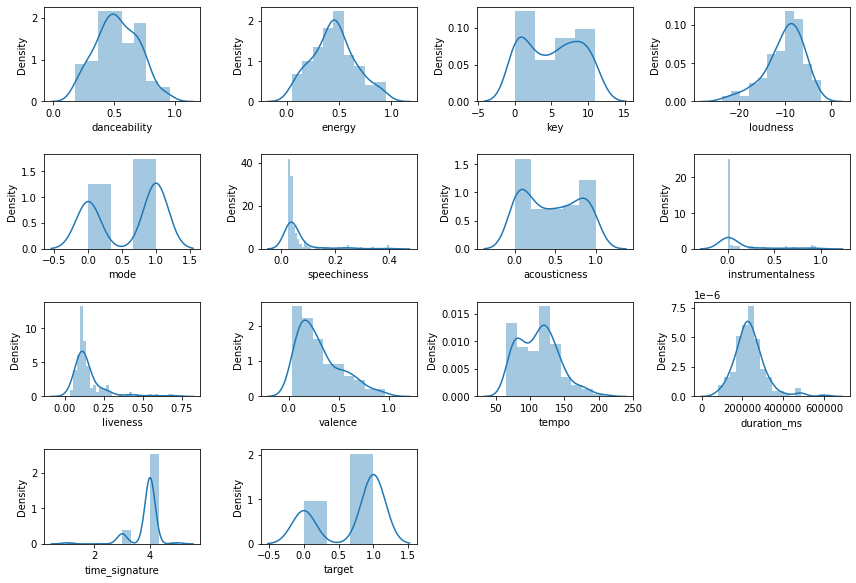

In [74]:
import seaborn as sns

numerical_features = result.select_dtypes(exclude=['object']).drop(['level_0', 'index'], axis=1).copy()

fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(numerical_features.iloc[:,i].dropna())
    plt.xlabel(numerical_features.columns[i])
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='danceability', ylabel='Count'>

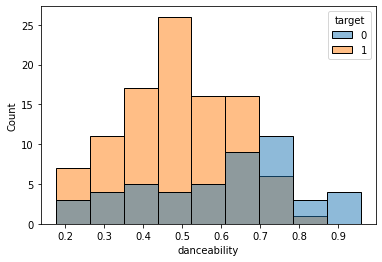

In [75]:
sns.histplot(data=result, x="danceability", hue="target")

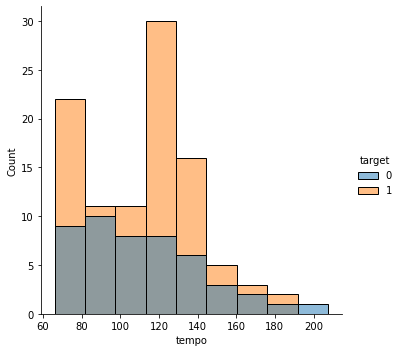

In [76]:
sns.displot(data=numerical_features, x="tempo", hue="target")

In [77]:
numerical_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,target
0,0.628,0.500,6,-9.660,0,0.0268,0.44000,0.000000,0.2440,0.6800,124.932,147027,4,1
1,0.402,0.582,10,-6.853,0,0.0408,0.69000,0.249000,0.4070,0.5140,115.425,317507,4,0
2,0.761,0.525,11,-6.900,1,0.0944,0.44000,0.000007,0.0921,0.5310,80.870,238805,4,0
3,0.642,0.723,1,-6.149,1,0.2430,0.58000,0.000942,0.1120,0.4870,186.043,135480,4,0
4,0.492,0.590,4,-4.032,0,0.0313,0.00109,0.002300,0.2710,0.1790,117.637,229517,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0.520,0.572,6,-12.838,0,0.0402,0.35200,0.947000,0.1030,0.0985,157.934,136400,3,1
144,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000000,0.0995,0.2360,148.033,222973,4,1
145,0.255,0.161,9,-12.711,0,0.0327,0.92500,0.015500,0.1470,0.0679,74.007,309720,4,1
146,0.802,0.410,9,-12.793,1,0.0454,0.41100,0.001070,0.0941,0.2240,106.047,241547,4,1


In [78]:
columns = []

for col in X.columns:
    columns.append(col)


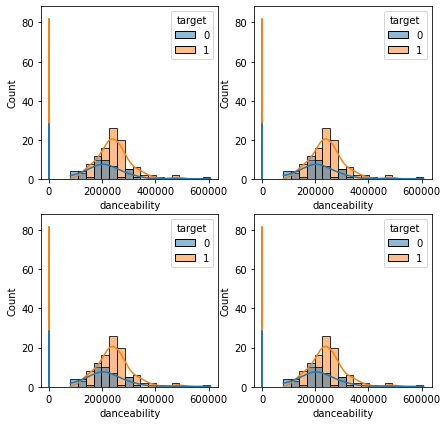

In [79]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

for i in range(0, 2):
    for j in range(0, len(columns)):
        for k in range(0, 2):
            sns.histplot(data=result, x=columns[j], kde=True, color="skyblue", hue="target", ax=axs[i, k])

In [80]:
import matplotlib.pyplot as plt

color = []

for i in range(0, len(y)):
    if y[i] == 0:
        color.append("blue")
    else:
        color.append("magenta")

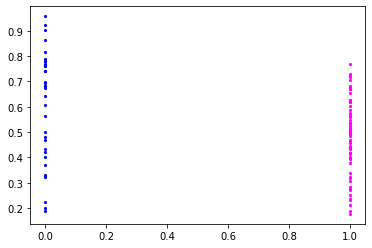

In [81]:
for i in range(0, 109):
    plt.scatter(y[i], X[columns[0]][i], c=color[i], s=10, linewidth = 0)
    

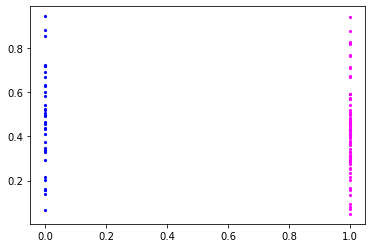

In [82]:
for i in range(0, 109):
    plt.scatter(y[i], X[columns[1]][i], c=color[i], s=10, linewidth = 0)

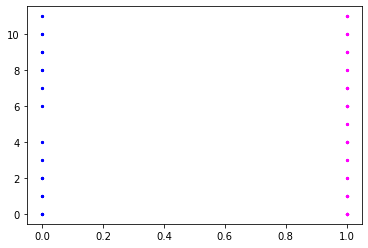

In [83]:
for i in range(0, 109):
    plt.scatter(y[i], X[columns[2]][i], c=color[i], s=10, linewidth = 0)